<a href="https://colab.research.google.com/github/EINSHOWERADMIRAL/EINSHOWERADMIRAL/blob/main/K_MEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
data=pd.read_csv('https://github.com/NelakurthiSudheer/Mall-Customers-Segmentation/raw/refs/heads/main/Dataset/Mall_Customers.csv')


In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
data_encoded = pd.get_dummies(data, drop_first=True)

# Now calculate the correlation matrix
correlation_matrix = data_encoded.corr()

print(correlation_matrix)


                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   
Gender_Male               0.057400  0.060867            0.056410   

                        Spending Score (1-100)  Gender_Male  
CustomerID                            0.013835     0.057400  
Age                                  -0.327227     0.060867  
Annual Income (k$)                    0.009903     0.056410  
Spending Score (1-100)                1.000000    -0.058109  
Gender_Male                          -0.058109     1.000000  


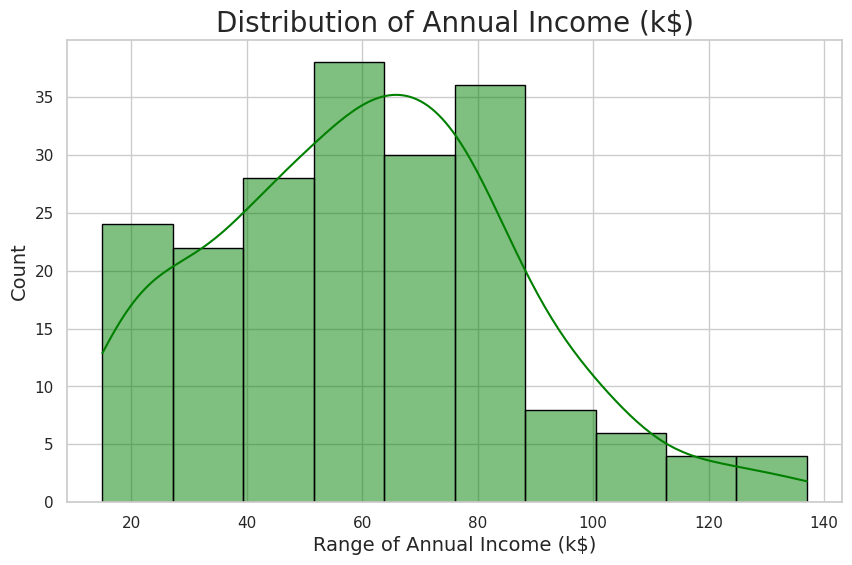

In [12]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
# Create the distribution plot with green color
sns.histplot(data['Annual Income (k$)'], kde=True, color='green', edgecolor='black')
# Add titles and labels
plt.title('Distribution of Annual Income (k$)', fontsize=20)
plt.xlabel('Range of Annual Income (k$)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

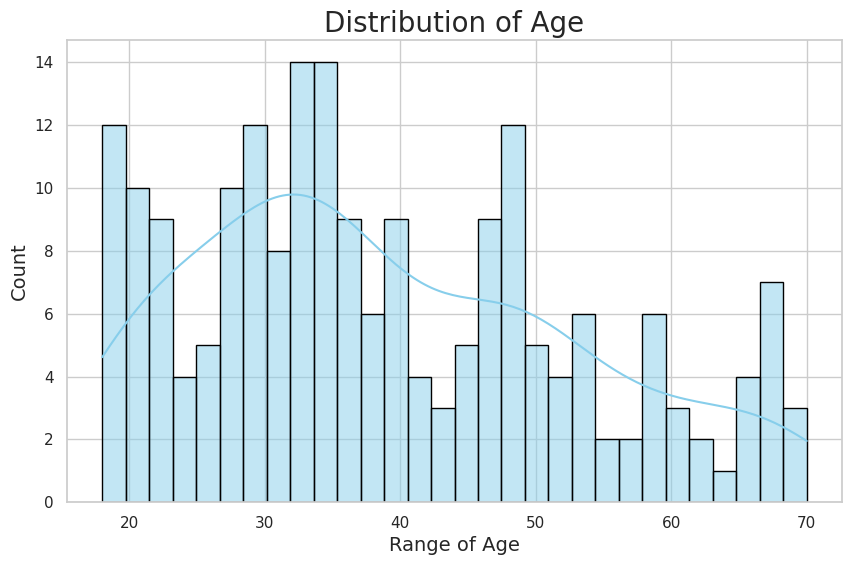

In [13]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, color='skyblue', edgecolor='black', bins=30)

# Add titles and labels
plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Range of Age', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()



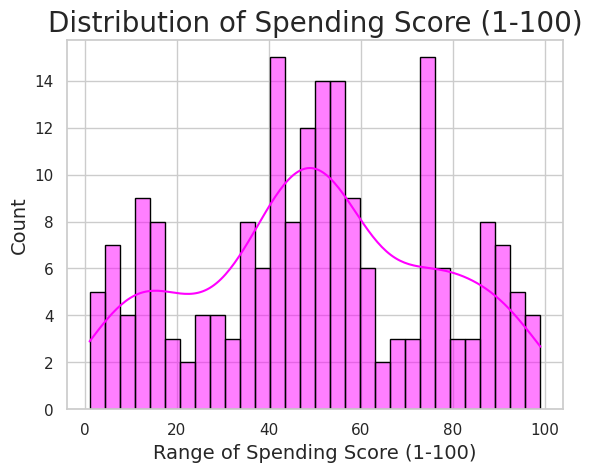

In [15]:
sns.set(style='whitegrid')

# Create the distribution plot with advanced colors
sns.histplot(data['Spending Score (1-100)'], kde=True, color='magenta', edgecolor='black', bins=30)

# Add titles and labels
plt.title('Distribution of Spending Score (1-100)', fontsize=20)
plt.xlabel('Range of Spending Score (1-100)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()


<ipython-input-16-bb56c113f516>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genders.index, y=genders.values, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


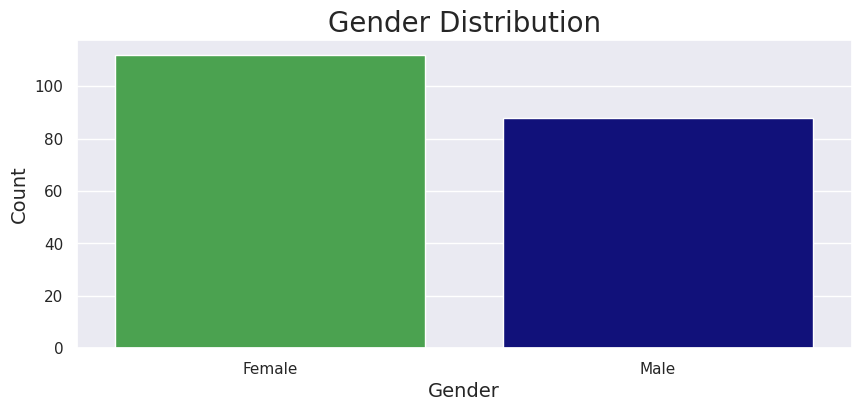

In [16]:
genders = data.Gender.value_counts()

# Set the style to darkgrid
sns.set_style("darkgrid")

# Create the figure
plt.figure(figsize=(10, 4))

# Create a color palette with brown and magenta
colors = ['#3CB043', '#00008B']


# Create the barplot with advanced colors
sns.barplot(x=genders.index, y=genders.values, palette=colors)

# Add titles and labels
plt.title('Gender Distribution', fontsize=20)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

In [17]:
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


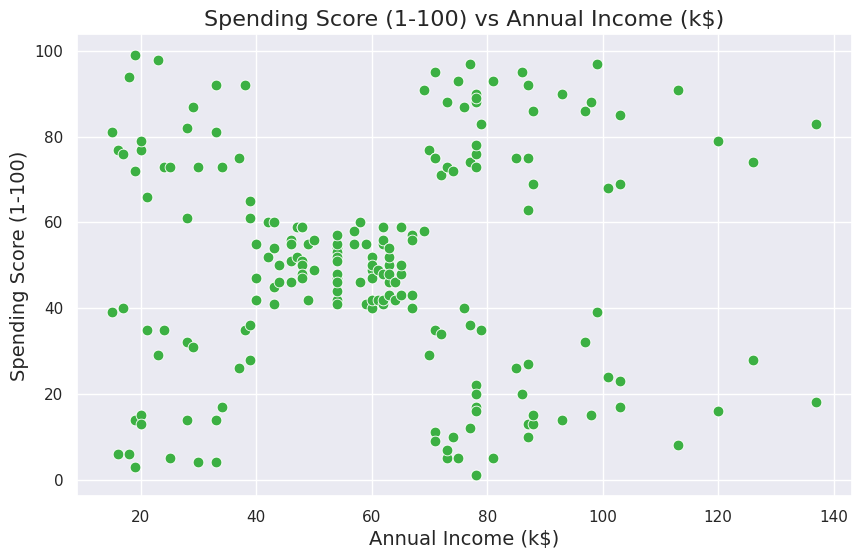

In [20]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with a custom color
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=X, s=60, color='#3CB043')

# Add labels and title
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.title('Spending Score (1-100) vs Annual Income (k$)', fontsize=16)

# Show the plot
plt.show()



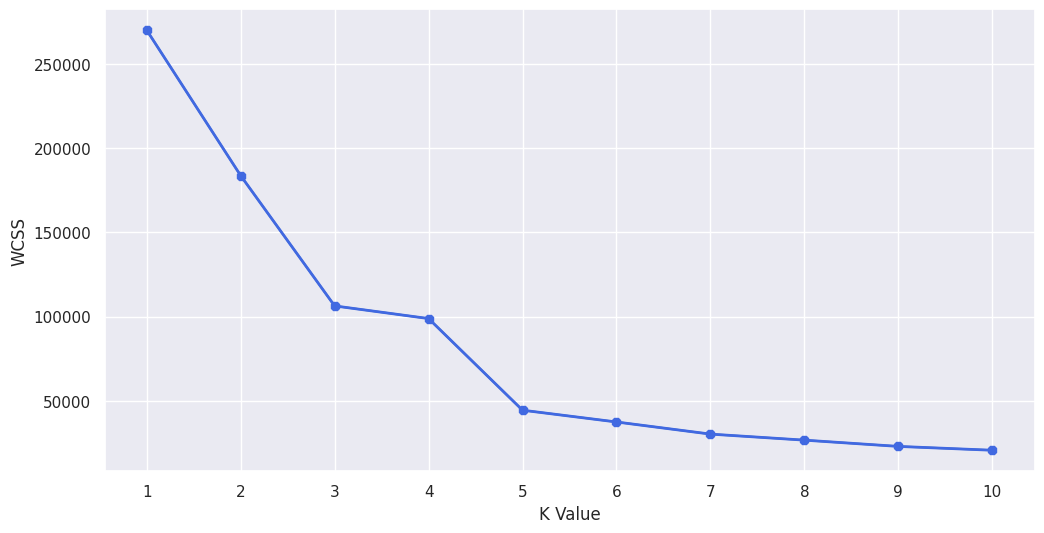

In [21]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="royalblue", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [22]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2


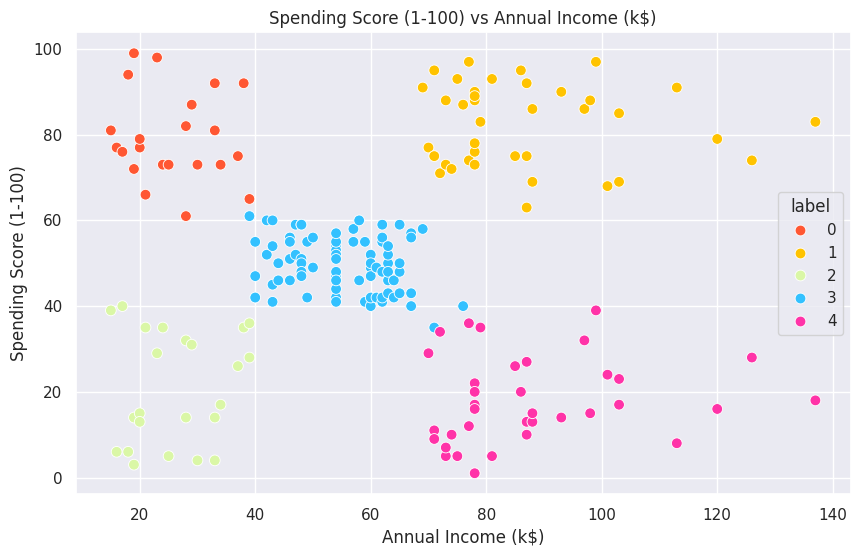

In [23]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",
                 palette=['#FF5733', '#FFC300', '#DAF7A6', '#33C1FF', '#FF33A8']  , legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()


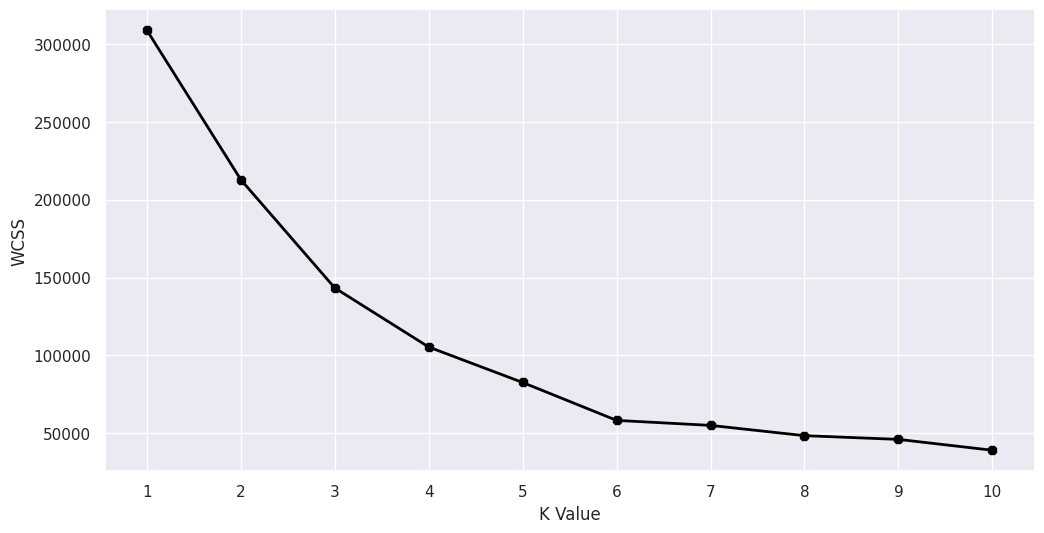

In [24]:
X2=df1[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color="black", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()


In [25]:
#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
df1["label"] = y2
#The data with labels
df1.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


<ipython-input-26-219b2c7eda74>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df1.Age[df1.label == label],


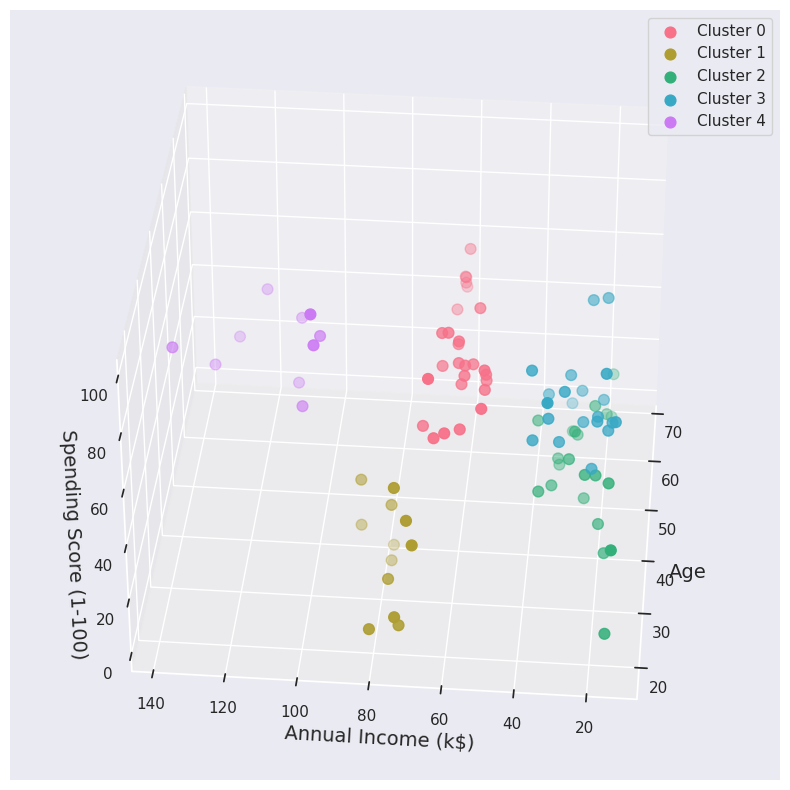

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Create a figure for the 3D plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Define a custom color palette using Seaborn
colors = sns.color_palette("husl", 5)  # Using a Husl color palette for 5 clusters

# Scatter plots for each cluster with advanced colors
for label in range(5):
    ax.scatter(df1.Age[df1.label == label],
               df1["Annual Income (k$)"][df1.label == label],
               df1["Spending Score (1-100)"][df1.label == label],
               c=colors[label], s=60, label=f'Cluster {label}')

# Set the view angle for better visualization
ax.view_init(35, 185)

# Label the axes
plt.xlabel("Age", fontsize=14)
plt.ylabel("Annual Income (k$)", fontsize=14)
ax.set_zlabel('Spending Score (1-100)', fontsize=14)

# Add a legend to identify clusters
plt.legend()

# Show the plot
plt.show()

In [28]:
cust1=df1[df1["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df1[df1["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df1[df1["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df1[df1["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df1[df1["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("**************************************************")


Number of customer in 1st group= 12
They are - [125 133 135 139 143 145 149 157 159 163 169 173]
--------------------------------------------
Number of customer in 2nd group= 21
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 45]
--------------------------------------------
Number of customer in 3rd group= 27
They are - [ 77  78  80  84  86  87  90  93  94  97  99 102 103 105 107 108 109 110
 111 113 117 118 119 120 122 123 127]
--------------------------------------------
Number of customer in 4th group= 21
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42]
--------------------------------------------
Number of customer in 5th group= 10
They are - [182 184 186 188 190 192 194 196 198 200]
**************************************************
